# Visualize circuits

A visualization is useful while working with quantum circuits. Below find options in Qiskit for drawing circuits, plotting data from executed jobs, seeing the state of a quantum computer, and more.

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

## Draw a quantum circuit

Drawing a circuit is supported natively by a `QuantumCircuit` object. You can either call `print()` on the circuit, or call the `draw()` method on the object. This will render an ASCII art version of the circuit diagram.

In [2]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [3]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


In [4]:
circuit.draw()

┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1

### Alternative renderers

A text output is useful for quickly seeing the output while developing a circuit, but it doesn't provide the most flexibility. There are two alternative output renderers for the quantum circuit. One uses [matplotlib](https://matplotlib.org/), and the other uses [LaTeX](https://www.latex-project.org/), which leverages the [qcircuit package](https://github.com/CQuIC/qcircuit). These can be specified with `mpl` and `latex` values for the `output` kwarg on the draw() method.

<Admonition type="tip">
  OSX users can get the required LaTeX packages through the [mactex package](https://www.tug.org/mactex/)
</Admonition>

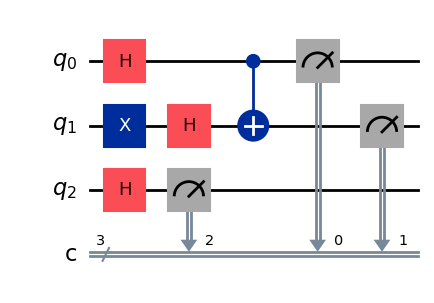

In [5]:
# Matplotlib drawing
circuit.draw(output='mpl')

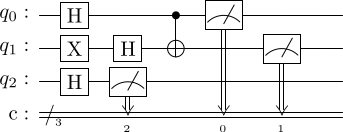

In [6]:
# Latex drawing
circuit.draw(output='latex')

### Control output from circuit.draw()

By default, the `draw()` method returns the rendered image as an object and does not output anything. The exact class returned depends on the output specified: `'text'` (the default) returns a `TextDrawer` object, `'mpl'` returns a `matplotlib.Figure` object, and `latex` returns a `PIL.Image` object. These return types enable modifying or directly interacting with the rendered output from the drawers.

Jupyter notebooks understand these return types and render them properly, but when running outside of Jupyter, this feature is not automatic. However, the `draw()` method has optional arguments to display or save the output. When specified, the `filename` kwarg takes a path to which it saves the rendered output. Alternatively, if you're using the `mpl` or `latex` outputs, you can leverage the `interactive` kwarg to open the image in a new window (this will not always work from within a notebook).

### Customize the output

Depending on the output, there are also options to customize the circuit diagram.

#### Disable plot barriers and reverse bit order
The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the `reverse_bits` kwarg and `plot_barriers` kwarg, respectively. The examples below will work with any output renderer; `mpl` is used here for brevity.

In [7]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

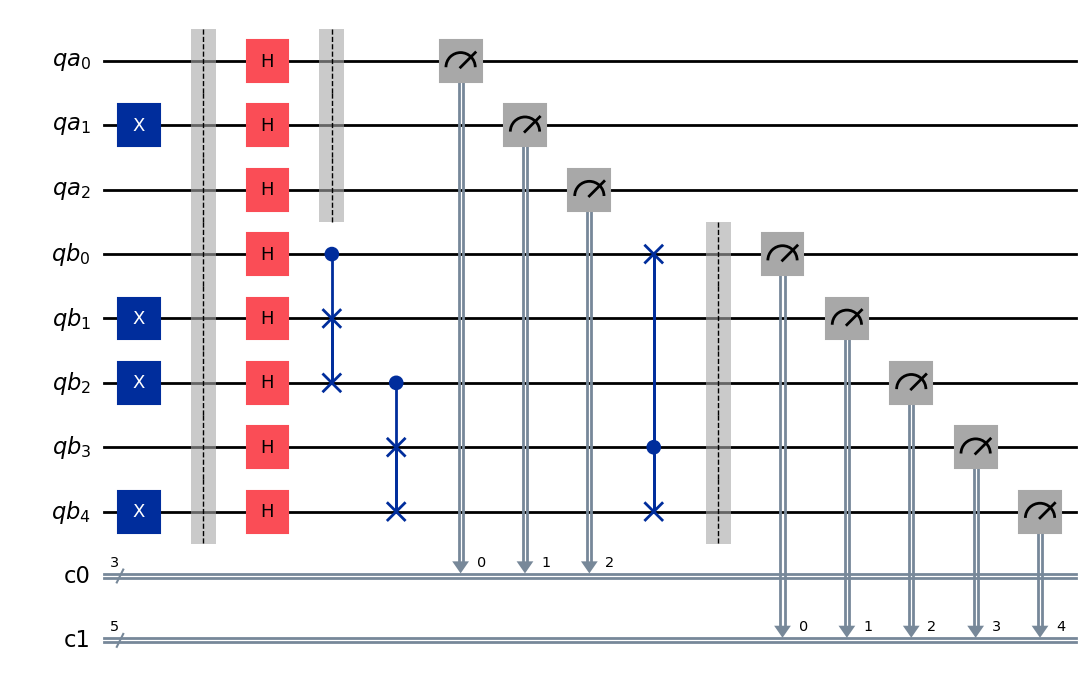

In [8]:
# Draw the circuit
circuit.draw(output='mpl')

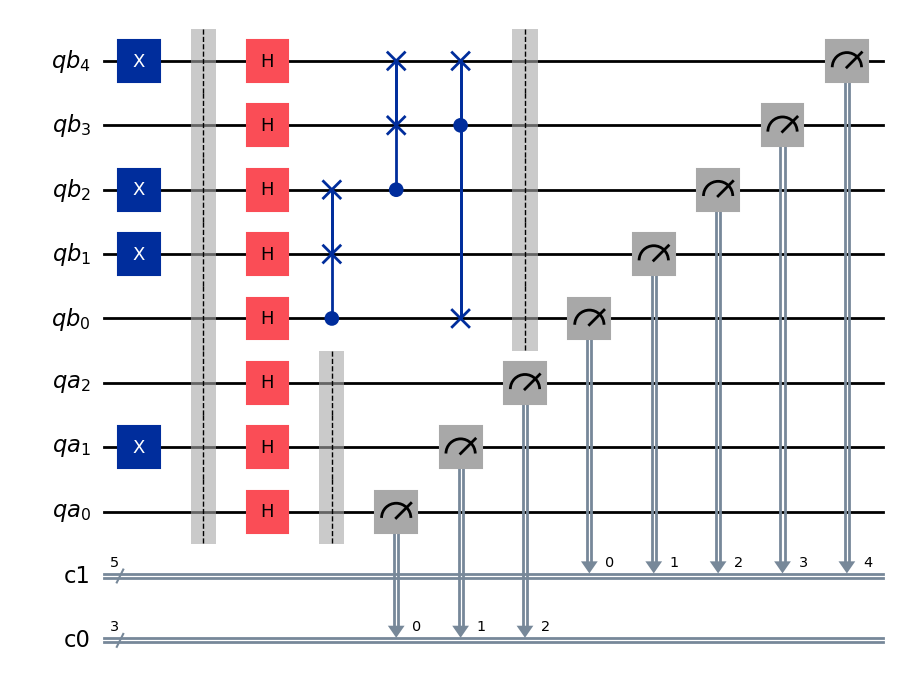

In [9]:
# Draw the circuit with reversed bit order
circuit.draw(output='mpl', reverse_bits=True)

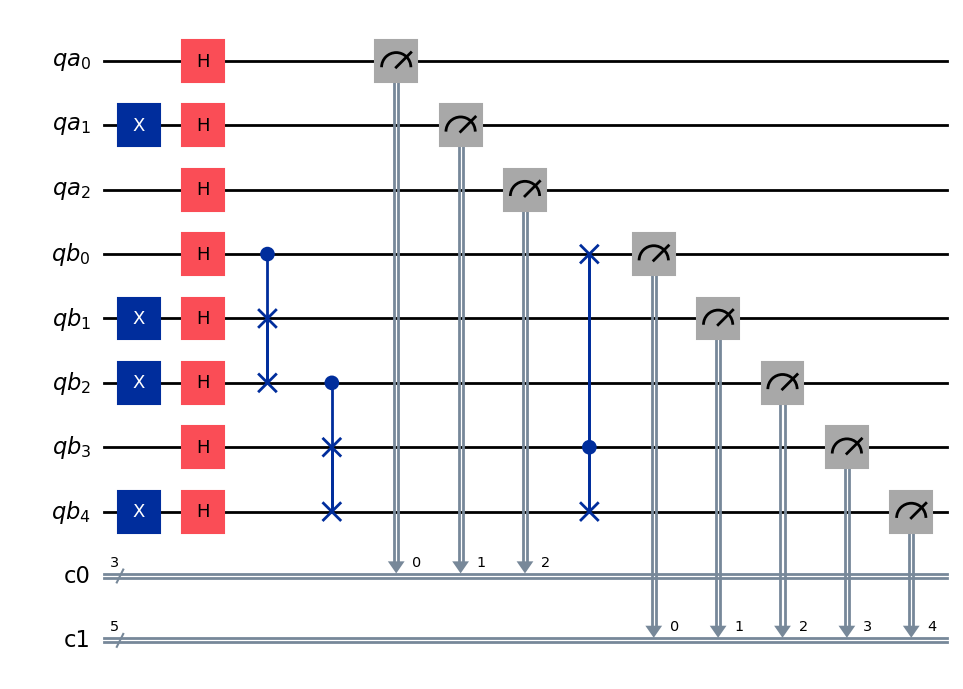

In [10]:
# Draw the circuit without barriers
circuit.draw(output='mpl', plot_barriers=False)

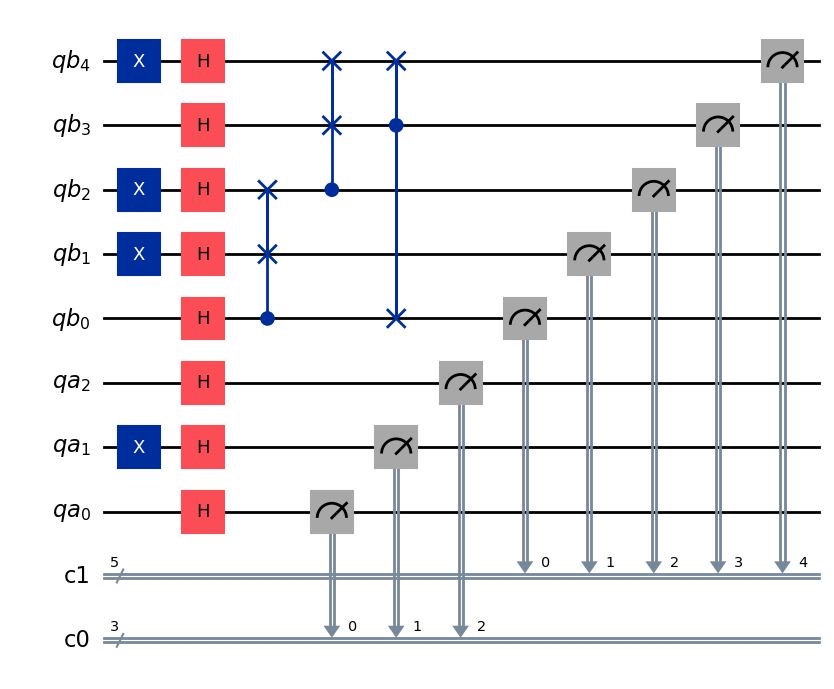

In [11]:
# Draw the circuit without barriers and reverse bit order
circuit.draw(output='mpl', plot_barriers=False, reverse_bits=True)

### Renderer-specific customizations

Some available customizing options are specific to a renderer.

The `fold` kwarg can be used to set a maximum width for the output.  In the `text` renderer, this sets the length of the lines of the diagram before it is wrapped to the next line.  When using the 'mpl' renderer, this is used as the number of (visual) layers before folding to the next line.

The `mpl` renderer has the `style` kwarg, which is used to customize the output.

The `scale` option is used by the `mpl` and `latex` renderers to scale the size of the output image with a multiplicative adjustment factor.

The `style` kwarg takes in a `dict` with multiple options, including specifying colors, changing rendered text for different types of gates, choosing different line styles, and more.

Available options are:

- **textcolor** (str): The color code for text. Defaults to `'#000000'`
- **subtextcolor** (str): The color code for subtext. Defaults to `'#000000'`
- **linecolor** (str): The color code for lines. Defaults to `'#000000'`
- **creglinecolor** (str): The color code for classical register lines `'#778899'`
- **gatetextcolor** (str): The color code for gate text `'#000000'`
- **gatefacecolor** (str): The color code for gates. Defaults to `'#ffffff'`
- **barrierfacecolor** (str): The color code for barriers. Defaults to `'#bdbdbd'`
- **backgroundcolor** (str): The color code for the background. Defaults to `'#ffffff'`
- **fontsize** (int): The font size for text. Defaults to 13
- **subfontsize** (int): The font size for subtext. Defaults to 8
- **displaytext** (dict): A dictionary of the text for each element
    type in the output visualization. The default values are:


        'id': 'id',
        'u0': 'U_0',
        'u1': 'U_1',
        'u2': 'U_2',
        'u3': 'U_3',
        'x': 'X',
        'y': 'Y',
        'z': 'Z',
        'h': 'H',
        's': 'S',
        'sdg': 'S^\\dagger',
        't': 'T',
        'tdg': 'T^\\dagger',
        'rx': 'R_x',
        'ry': 'R_y',
        'rz': 'R_z',
        'reset': '\\left|0\\right\\rangle'


    You must specify all the necessary values if using this. There is
    no provision for an incomplete dict passed in.
- **displaycolor** (dict): The color codes to use for each circuit element.
    By default, all values default to the value of `gatefacecolor` and
    the keys are the same as `displaytext`. Also, just like
    `displaytext`, there is no provision for an incomplete dict passed
    in.
- **latexdrawerstyle** (bool): When set to True, enable LaTeX mode, which will
    draw gates like the `latex` output modes.
- **usepiformat** (bool): When set to True, use radians for output.
- **fold** (int): The number of circuit elements at which to fold the circuit.
    Defaults to 20
- **cregbundle** (bool): If set True, bundle classical registers.
- **showindex** (bool): If set True, draw an index.
- **compress** (bool): If set True, draw a compressed circuit.
- **figwidth** (int): The maximum width (in inches) for the output figure.
- **dpi** (int): The DPI to use for the output image. Defaults to 150.
- **creglinestyle** (str): The style of line to use for classical registers.
    Choices are `'solid'`, `'doublet'`, or any valid matplotlib
    `linestyle` kwarg value. Defaults to `doublet`.

In [12]:
# Set line length to 80 for above circuit
circuit.draw(output='text')

░ ┌───┐ ░    ┌─┐                           
qa_0: ──────░─┤ H ├─░────┤M├───────────────────────────
      ┌───┐ ░ ├───┤ ░    └╥┘┌─┐                        
qa_1: ┤ X ├─░─┤ H ├─░─────╫─┤M├────────────────────────
      └───┘ ░ ├───┤ ░     ║ └╥┘┌─┐                     
qa_2: ──────░─┤ H ├─░─────╫──╫─┤M├─────────────────────
            ░ ├───┤ ░     ║  ║ └╥┘    ░ ┌─┐            
qb_0: ──────░─┤ H ├─■─────╫──╫──╫──X──░─┤M├────────────
      ┌───┐ ░ ├───┤ │     ║  ║  ║  │  ░ └╥┘┌─┐         
qb_1: ┤ X ├─░─┤ H ├─X─────╫──╫──╫──┼──░──╫─┤M├─────────
      ├───┤ ░ ├───┤ │     ║  ║  ║  │  ░  ║ └╥┘┌─┐      
qb_2: ┤ X ├─░─┤ H ├─X──■──╫──╫──╫──┼──░──╫──╫─┤M├──────
      └───┘ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║ └╥┘┌─┐   
qb_3: ──────░─┤ H ├────X──╫──╫──╫──■──░──╫──╫──╫─┤M├───
      ┌───┐ ░ ├───┤    │  ║  ║  ║  │  ░  ║  ║  ║ └╥┘┌─┐
qb_4: ┤ X ├─░─┤ H ├────X──╫──╫──╫──X──░──╫──╫──╫──╫─┤M├
      └───┘ ░ └───┘       ║  ║  ║     ░  ║  ║  ║  ║ └╥┘
c0: 3/════════════════════╩══╩══╩════════╬══╬══╬══╬══╬═
                          0  1  2        ║  ║  ║  ║  ║ 
c1: 5/═══════════════════════════════════╩══╩══╩══╩══╩═
                                         0  1  2  3  4

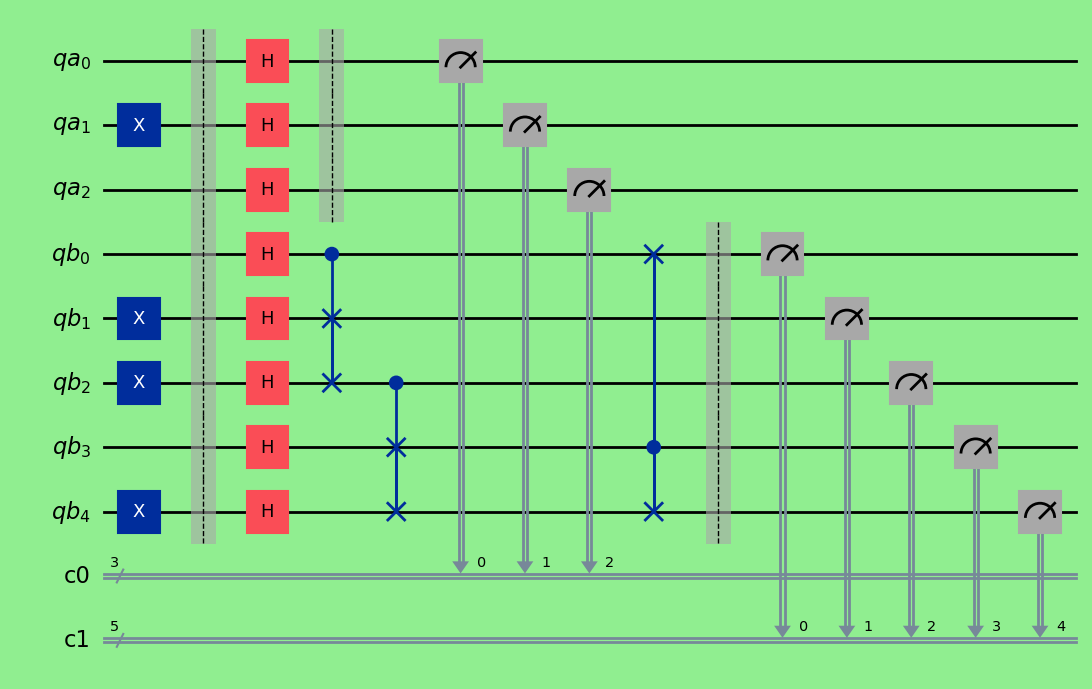

In [13]:
# Change the background color in mpl

style = {'backgroundcolor': 'lightgreen'}

circuit.draw(output='mpl', style=style)

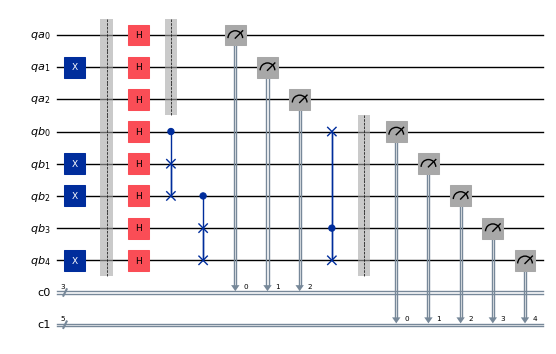

In [14]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output='mpl', scale=0.5)

### circuit_drawer() as function

If you have an application where you prefer to draw a circuit with a self-contained function instead of as a method of a circuit object, you can directly use the `circuit_drawer()` function, which is part of the public stable interface from `qiskit.visualization`. The function behaves identically to the `circuit.draw()` method, except that it takes in a circuit object as required argument.

<div class="alert alert-block alert-info">
<b>Note:</b> In Qiskit Terra <b> $<=$ 0.7, </b> the default behavior for the circuit_drawer() from qiskit.tools.visualization import circuit_drawer function is to use the <i>latex</i> output backend, and in <b>0.6.x</b> that includes a fallback to <i>mpl</i> if <i>latex</i> fails for any reason. Starting with release <b> > 0.7, </b>the default changes to the <i>text</i> output.
</div>

In [15]:
from qiskit.visualization import circuit_drawer

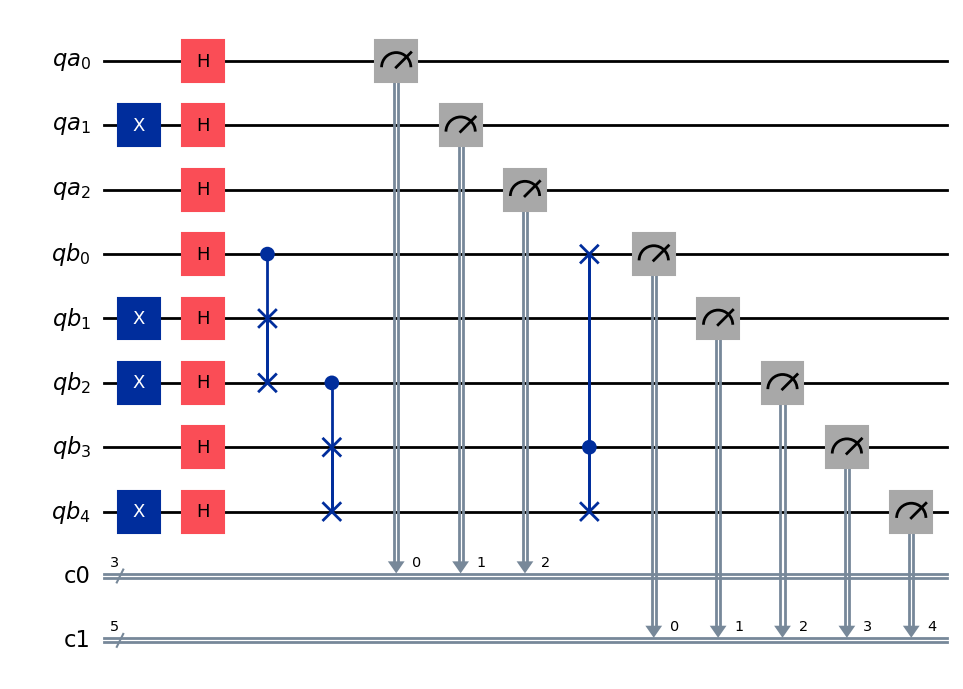

In [16]:
circuit_drawer(circuit, output='mpl', plot_barriers=False)

## Next steps

<Admonition type="tip" title="Recommendations">
  -  See an example of circuit visualization in the [Grover's Algorithm](https://learning.quantum.ibm.com/tutorial/grovers-algorithm) tutorial.
  -  Visualize simple circuits in the [Explore gates and circuits with the Quantum Composer](https://learning.quantum.ibm.com/tutorial/explore-gates-and-circuits-with-the-quantum-composer) tutorial.
  -  Review the [Qiskit visualizations API documentation](/api/qiskit/visualization).
</Admonition>